# Bias and Variance:

- Two critical ascpects of any Machine Learning Algorithm's performance.
- Achieving a balance between them is essential for creating model that fit the data well so that we can generalize the model on new unseen also.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating a synthetic Data
np.random.seed(42)     # used to set the randomness
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualize the above data

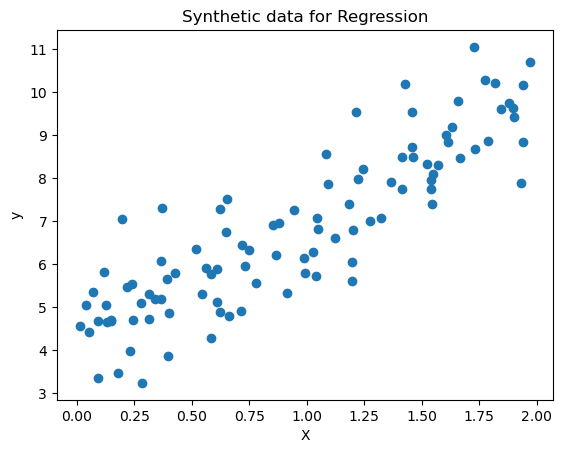

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel('y')
plt.title("Synthetic data for Regression")
plt.show()

# Split X and y into train set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit Linear Regression on train set

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

# Perform Predictions on X_train & X_test

In [9]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Visualize the Model Performance

In [10]:
def plot_predictions(X, y, y_pred, title):
    plt.scatter(X, y, label = "Actual Data")
    plt.plot(X, y_pred, color = 'red', label = 'Model_prediction')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.show()

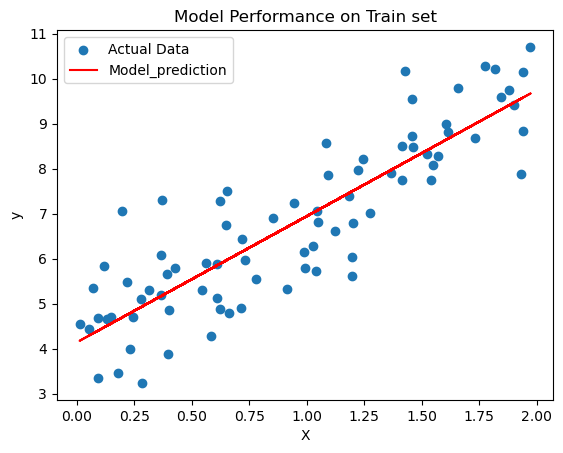

In [11]:
# Training set

plot_predictions(X_train, y_train, y_pred_train, "Model Performance on Train set")

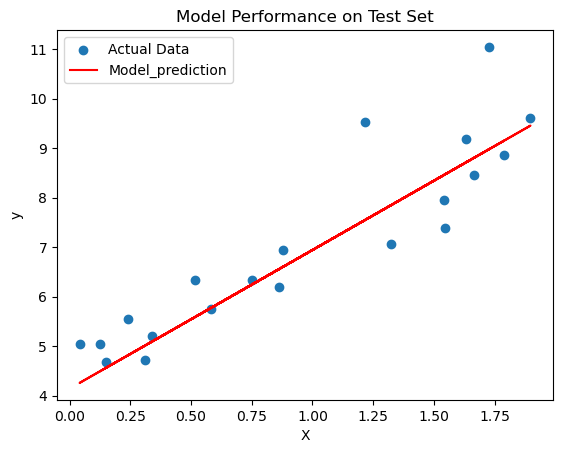

In [12]:
# Test set
plot_predictions(X_test, y_test, y_pred_test, "Model Performance on Test Set")

# Evaluate Bias and Variance

In [13]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [14]:
mse_train

0.8476788564209705

In [15]:
mse_test

0.6536995137170021

#### Bias : The error on the train data we call it bias
#### Variance : The error on the test data we call it as variance

### Observations:
- In the above case, the error on the train data is high which means it is high bias
- the error on the test data is low which means it is low variance

- The above becomes, high bias and low variance => underfitting

# Note: 
- When error on train set is high and test set is low it is a case of Underfitting
- High Bias and Low Variance = Underfitting

#### Why Underfitting is problematic?

- The accuries become misleading in case of underfitting
- In the above, the accuracy 80% cannot be completely trusted becuase there is underfitting happening on the data

In [16]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [17]:
r2_train

0.7582381034538057

In [18]:
r2_test

0.8072059636181392

# Introducing Polynomial Features to increase Model complexity

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 50)
poly

PolynomialFeatures(degree=50)

In [43]:
# Applying polynomial features to transform the X_train and X_test to degree 10
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

## Apply LinearRegression on X_poly_train and y_train

In [44]:
poly_model = LinearRegression()
poly_model

LinearRegression()

In [45]:
poly_model.fit(X_poly_train, y_train)

LinearRegression()

# Perform Predictions on X_poly_train and X_poly_test

In [46]:
y_poly_pred_train = poly_model.predict(X_poly_train)
y_poly_pred_test = poly_model.predict(X_poly_test)

# Visualize the result

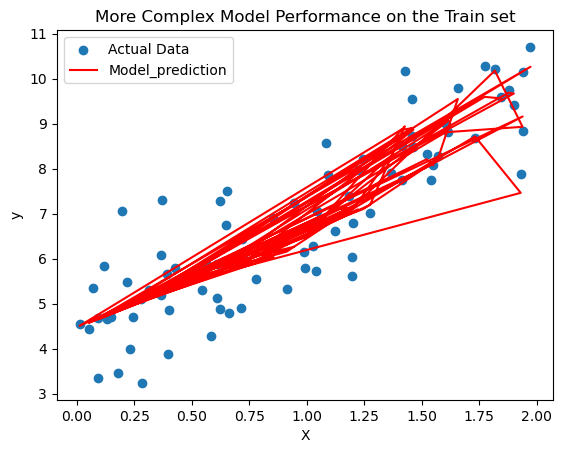

In [47]:
plot_predictions(X_train, y_train, y_poly_pred_train, "More Complex Model Performance on the Train set")

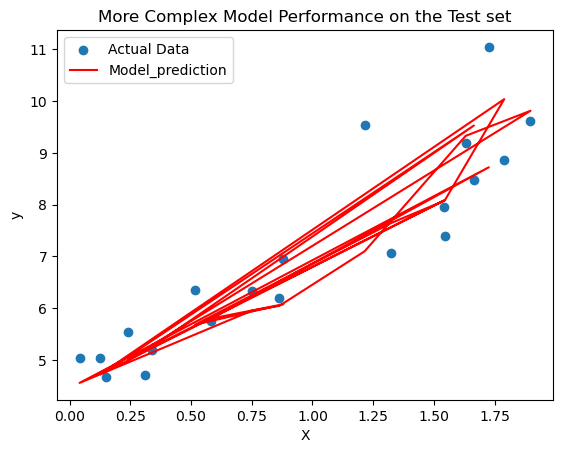

In [48]:
plot_predictions(X_test, y_test, y_poly_pred_test, "More Complex Model Performance on the Test set")

# Evaluate Bias and Variance of the Complex Model

In [49]:
# Cal. mean squared error

mse_poly_train = mean_squared_error(y_train, y_poly_pred_train)
mse_poly_test = mean_squared_error(y_test, y_poly_pred_test)

In [50]:
mse_poly_train

0.6689344495063417

In [51]:
mse_poly_test

0.8456839655347203

# Observations:
- For the complex model case, error is low on train set and error is high on test set
- Low bias and High variance => overfitting
- When we look at accuracy they appear to be same indicating no underfitting or overfitting issue. Which is again misleading.
- Is accuracy a good metric to jugde model performance?
- Answer : NO

# Note:
- Overfitting happens in a complex model. When Overfitting happens go for simple models.
- Underfitting happens in a simple model. When Underfitting happens go for complex model.

# Bias Variance Trade off

Dataset I : Simple Model: train = 86, test = 60 =>Underfitting, To overcome this go for complex model
    
Dataset II : Complex Model : train = 60, test = 75 => Overfitting, To overcome this gor for simple model

# Bias Variance Trade off strategies:

1. Model Complexity : Choose an appropriate level of model complexity.
2. Regularizaton: For a complex model when you face overfitting issues, you can apply L1 Regularization or L2 Regularization.
3. Cross - Validation : Divide the data into multiple train and test sets using techniques like k - fold cross validation and then evaluate model's performance
4. Ensemble Methods: Combine predictions from multiple models to reduce variance

In [52]:
r2_poly_train = r2_score(y_poly_pred_train, y_train)
r2_poly_train

0.7497576246867461

In [53]:
r2_poly_test = r2_score(y_poly_pred_test, y_test)
r2_poly_test

0.7468605166408201